# Scikit-Learn Models

## Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree, neural_network
from sklearn.linear_model import SGDClassifier, LogisticRegression

## Read in data

In [2]:
credit_df = pd.read_csv('~/documents/Data/Credit Card Fraud Data/credit_card_clean.csv', index_col = 0)

## Transform data

Shuffle the data to increase the likelihood of having a well-stratified train-test split.

In [3]:
credit_df = credit_df.sample(frac = 1, random_state = 42)

Separate the feature and target variables.

In [4]:
X = credit_df[credit_df.columns[:-1]]
y = credit_df['Fraud']

Split the data into a training set and a testing set.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(248096, 29)
(27567, 29)
(248096,)
(27567,)


## Logistic regression classifier

#### Instantiate and fit the model

In [7]:
model_name = 'Logistic regression'
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_score = model.fit(X_train, y_train).decision_function(X_test)

#### Model performance

Generate a no-skill probability list and a model probability list.

In [8]:
ns_probs = [0 for _ in range(len(X_test))]
model_probs = model.predict_proba(X_test)

Only keep the column for the positive outcome, i.e. fraudulent data.

In [9]:
model_probs = model_probs[:, 1]

Generate ROCAUC scores.

In [10]:
ns_auc = roc_auc_score(y_test, ns_probs)
model_auc = roc_auc_score(y_test, model_probs)
print('No Skill ROC AUC = %.3f' % (ns_auc))
print(model_name, 'ROC AUC = %.3f' % (model_auc))

No Skill ROC AUC = 0.500
Logistic regression ROC AUC = 0.990


Calculate and plot ROC curves.

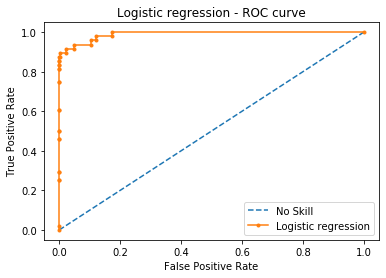

In [11]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No Skill')
plt.plot(model_fpr, model_tpr, marker = '.', label=model_name)
plt.title(model_name + ' - ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [12]:
model_comparison = pd.DataFrame({'ROC AUC Score (%)' : [round(model_auc * 100, 1)]})

model_comparison.index = model_comparison.index.map(str)
model_comparison.index = [model_name]

## Stochastic gradient descent classifier

#### Instantiate and fit the model

In [13]:
model_name = 'Stochastic gradient descent classifier'
model = SGDClassifier(loss = 'log')
y_score = model.fit(X_train, y_train).decision_function(X_test)

#### Model performance

Generate a no-skill probability list and a model probability list.

In [14]:
ns_probs = [0 for _ in range(len(X_test))]
model_probs = model.predict_proba(X_test)

Only keep the column for the positive outcome, i.e. fraudulent data.

In [15]:
model_probs = model_probs[:, 1]

Generate ROCAUC scores.

In [16]:
ns_auc = roc_auc_score(y_test, ns_probs)
model_auc = roc_auc_score(y_test, model_probs)
print('No Skill ROC AUC = %.3f' % (ns_auc))
print(model_name, 'ROC AUC = %.3f' % (model_auc))

No Skill ROC AUC = 0.500
Stochastic gradient descent classifier ROC AUC = 0.992


Calculate and plot ROC curves.

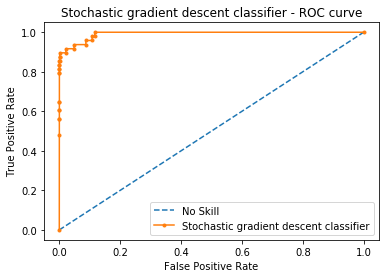

In [17]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No Skill')
plt.plot(model_fpr, model_tpr, marker = '.', label=model_name)
plt.title(model_name + ' - ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [18]:
score = pd.Series({'ROC AUC Score (%)' : round(model_auc * 100, 1)}, name = model_name)
model_comparison = model_comparison.append(score)

In [19]:
model_comparison

,ROC AUC Score (%)
Logistic regression,99.0
Stochastic gradient descent classifier,99.2


## Decision tree classifier

#### Instantiate and fit the model

In [20]:
model_name = 'Decision tree classifier'
model = tree.DecisionTreeClassifier()
y_score = model.fit(X_train, y_train)

#### Model performance

Generate a no-skill probability list and a model probability list.

In [21]:
ns_probs = [0 for _ in range(len(X_test))]
model_probs = model.predict_proba(X_test)

Only keep the column for the positive outcome, i.e. fraudulent data.

In [22]:
model_probs = model_probs[:, 1]

Generate ROCAUC scores.

In [23]:
ns_auc = roc_auc_score(y_test, ns_probs)
model_auc = roc_auc_score(y_test, model_probs)
print('No Skill ROC AUC = %.3f' % (ns_auc))
print(model_name, 'ROC AUC = %.3f' % (model_auc))

No Skill ROC AUC = 0.500
Decision tree classifier ROC AUC = 0.875


Calculate and plot ROC curves.

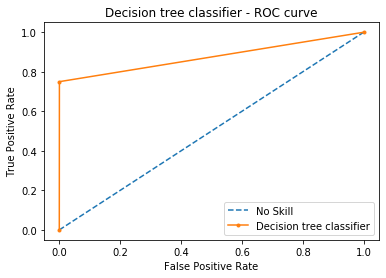

In [24]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No Skill')
plt.plot(model_fpr, model_tpr, marker = '.', label=model_name)
plt.title(model_name + ' - ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [25]:
score = pd.Series({'ROC AUC Score (%)' : round(model_auc * 100, 1)}, name = model_name)
model_comparison = model_comparison.append(score)

## Neural network classifier

#### Instantiate and fit the model

In [26]:
model_name = 'Neural network'
model = neural_network.MLPClassifier(hidden_layer_sizes = (10, 5, 5))
y_score = model.fit(X_train, y_train)

#### Model performance

Generate a no-skill probability list and a model probability list.

In [27]:
ns_probs = [0 for _ in range(len(X_test))]
model_probs = model.predict_proba(X_test)

Only keep the column for the positive outcome, i.e. fraudulent data.

In [28]:
model_probs = model_probs[:, 1]

Generate ROCAUC scores.

In [29]:
ns_auc = roc_auc_score(y_test, ns_probs)
model_auc = roc_auc_score(y_test, model_probs)
print('No Skill ROC AUC = %.3f' % (ns_auc))
print(model_name, 'ROC AUC = %.3f' % (model_auc))

No Skill ROC AUC = 0.500
Neural network ROC AUC = 0.997


Calculate and plot ROC curves.

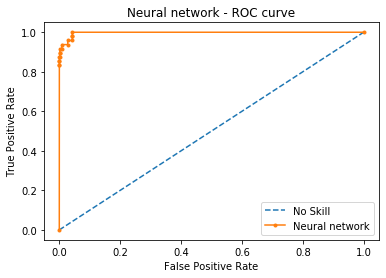

In [30]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
model_fpr, model_tpr, _ = roc_curve(y_test, model_probs)

plt.plot(ns_fpr, ns_tpr, linestyle = '--', label = 'No Skill')
plt.plot(model_fpr, model_tpr, marker = '.', label=model_name)
plt.title(model_name + ' - ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [31]:
score = pd.Series({'ROC AUC Score (%)' : round(model_auc * 100, 1)}, name = model_name)
model_comparison = model_comparison.append(score)

## Model comparison

In [32]:
model_comparison

,ROC AUC Score (%)
Logistic regression,99.0
Stochastic gradient descent classifier,99.2
Decision tree classifier,87.5
Neural network,99.7


The neural network appears to be the best model.

## Neural network - hyperparameter tuning

The function below fits a neural network model using the hyperparameters given, calculates the ROC AUC score, and adds this to the nn_comparison DataFrame for comparing to other models.

In [33]:
def test_nn(hidden_layer_sizes, activation_function, X_train, X_test, y_train, y_test, nn_comparison, name):
    'Determines the ROC AUC score for a neural network.'
    model = neural_network.MLPClassifier(hidden_layer_sizes = hidden_layer_sizes, activation = activation_function,
                                        random_state = 42)
    y_score = model.fit(X_train, y_train)

    model_probs = model.predict_proba(X_test)[:, 1]

    model_auc = roc_auc_score(y_test, model_probs)
    
    if name == 'hidden_layer_sizes':
        name = hidden_layer_sizes
    elif name == 'activation_function':
        name = activation_function

    mc = pd.Series({'ROC AUC Score (%)' : round(model_auc * 100, 2)}, name = str(name))
    nn_comparison = nn_comparison.append(mc)
    
    return nn_comparison

Here we use a single hidden layer and vary the number of nodes.

       ROC AUC Score (%)
(4,)               99.35
(5,)               99.59
(6,)               97.99
(7,)               99.69
(8,)               99.56
(9,)               99.51
(10,)              99.48
(11,)              99.70
(12,)              99.41
(13,)              99.67
(14,)              99.49
(15,)              99.23
(16,)              99.55


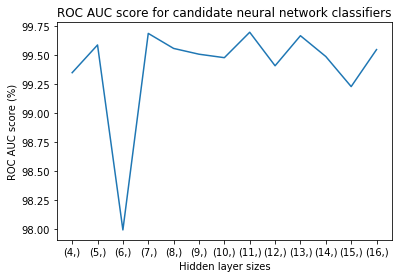

In [34]:
nn_comparison = pd.DataFrame()
nn_comparison.index = nn_comparison.index.map(str)

for i in range(4, 17, 1):
    nn_comparison = test_nn((i,), 'relu', X_train, X_test, y_train, y_test, nn_comparison, name = 'hidden_layer_sizes')
    
print(nn_comparison)

plt.plot(nn_comparison)
plt.title('ROC AUC score for candidate neural network classifiers')
plt.ylabel('ROC AUC score (%)')
plt.xlabel('Hidden layer sizes')
plt.show()

The ROC AUC score for 7 nodes, 11 nodes, and 13 nodes is very similar. I will use 7 nodes going forward based on the general principle that a simpler model is better in the absence of evidence to the contrary.

        ROC AUC Score (%)
(7, 2)              99.62
(7, 3)              99.08
(7, 4)              99.70
(7, 5)              99.55
(7, 6)              99.36
(7, 7)              99.67
(7, 8)              99.58


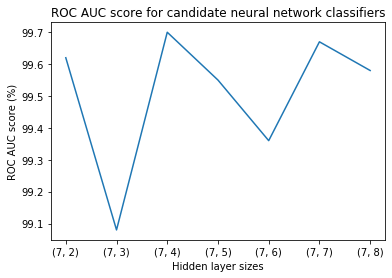

In [35]:
nn_comparison = pd.DataFrame()
nn_comparison.index = nn_comparison.index.map(str)

for i in range(2, 9, 1):
    nn_comparison = test_nn((7, i), 'relu', X_train, X_test, y_train, y_test, nn_comparison, name = 'hidden_layer_sizes')
    
print(nn_comparison)

plt.plot(nn_comparison)
plt.title('ROC AUC score for candidate neural network classifiers')
plt.ylabel('ROC AUC score (%)')
plt.xlabel('Hidden layer sizes')
plt.show()

The neural network with 7 nodes in the first hidden layer and 4 nodes in the second hidden layer performs the best. However, there is no material improvement upon the network with only one hidden layer of 7 nodes. I will therefore not use the second hidden layer.

          ROC AUC Score (%)
identity              99.14
logistic              99.31
tanh                  99.41
relu                  99.69


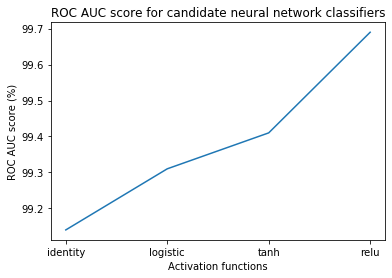

In [36]:
nn_comparison = pd.DataFrame()
nn_comparison.index = nn_comparison.index.map(str)

for act in ['identity', 'logistic', 'tanh', 'relu']:
    nn_comparison = test_nn((7,), act, X_train, X_test, y_train, y_test, nn_comparison, name = 'activation_function')
    
print(nn_comparison)

plt.plot(nn_comparison)
plt.title('ROC AUC score for candidate neural network classifiers')
plt.ylabel('ROC AUC score (%)')
plt.xlabel('Activation functions')
plt.show()

## Best model

Based on the results above, the best model is a Scikit-Learn MLPClassifier (i.e. neural network) with a single 7-node hidden layer and a ReLU activation function. The ROC AUC score for this model is 99.7%.